In [6]:
import numpy as np 
import pandas as pd

from data import RandomData
from model import RandomModel

In [7]:
%load_ext autoreload
%autoreload 2

### Load Data

In [15]:
dataset = RandomData(num_users=1000, num_products=1000, rnd_state=42).get_dataset()
train = dataset['train']

In [16]:
print(train.keys())

dict_keys(['user_product_ratings', 'product_descriptions', 'user_product_reviews'])


In [18]:
print(train['user_product_ratings'].head())

        user_id  product_id  rating
711178      711         178     1.0
836598      836         598     0.5
132378      132         378     4.0
965321      965         321     2.0
514267      514         267     2.5


In [20]:
train['user_product_ratings']['count'] = 1
print(train['user_product_ratings'].head())

        user_id  product_id  rating  count
711178      711         178     1.0      1
836598      836         598     0.5      1
132378      132         378     4.0      1
965321      965         321     2.0      1
514267      514         267     2.5      1


In [26]:
user_prod_ratings = train['user_product_ratings']
group_user = user_prod_ratings.groupby(by='user_id').sum()

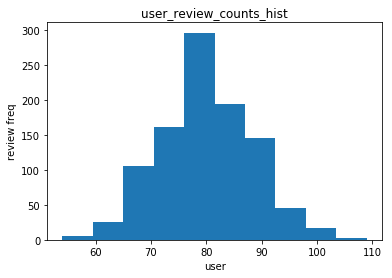

In [28]:
import matplotlib.pyplot as plt
import numpy as np

train['user_product_ratings']['count'] = 1
group_user = (train['user_product_ratings']).groupby(by='user_id').sum()
user_ratings_counts = group_user['count']
plt.hist(user_ratings_counts)
plt.title("user_review_counts_hist")
plt.xlabel("user")
plt.ylabel("review freq")

fig = plt.gcf()



### MSE Accuracy Metric

In [46]:
def evaluate_model(model, user_product_ratings_test):
    pred = model.predict(user_product_ratings_test[['user_id', 'product_id']])
    mse = np.mean((pred - user_product_ratings_test.rating) ** 2.)
    print(f'MSE: {mse:.2f}')
    return mse

In [50]:
model = RandomModel()
model.fit(train)
evaluate_model(model, train['user_product_ratings'])

MSE: 2.88


2.87868